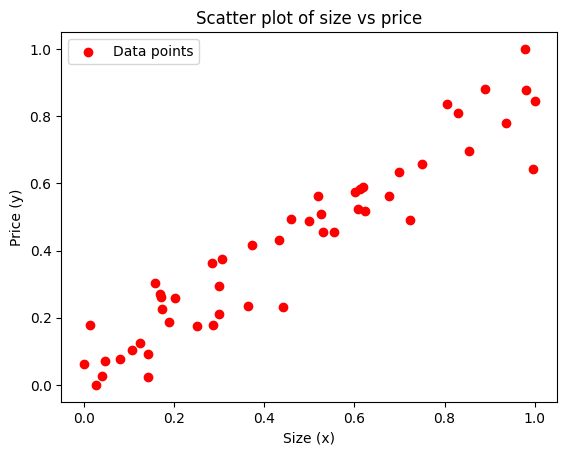

Epoch 0, Loss: 0.2304, w: 0.0061, b: 0.0177
Epoch 100, Loss: 0.0372, w: 0.2482, b: 0.2865
Epoch 200, Loss: 0.0283, w: 0.3393, b: 0.2753
Epoch 300, Loss: 0.0227, w: 0.4077, b: 0.2449
Epoch 400, Loss: 0.0185, w: 0.4658, b: 0.2170
Epoch 500, Loss: 0.0154, w: 0.5158, b: 0.1929
Epoch 600, Loss: 0.0131, w: 0.5588, b: 0.1720
Epoch 700, Loss: 0.0114, w: 0.5959, b: 0.1541
Epoch 800, Loss: 0.0102, w: 0.6278, b: 0.1386
Epoch 900, Loss: 0.0092, w: 0.6553, b: 0.1253


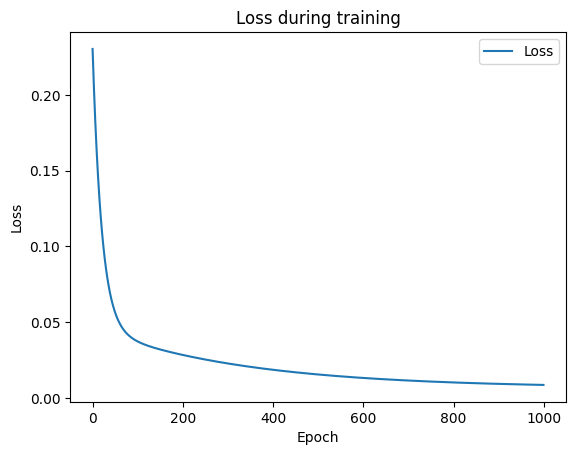

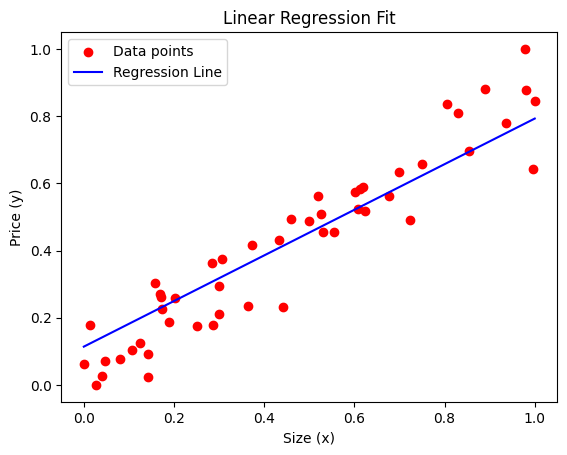

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pickle

# 生成随机数据
np.random.seed(42)  # 保证结果可复现
size = np.random.uniform(50, 150, 50)  # 样本的 x 值
price = 1 * size + 50 + np.random.normal(0, 10, 50)  # y = 1*x + 50 + 噪声

# 数据归一化
size = (size - np.min(size)) / (np.max(size) - np.min(size))
price = (price - np.min(price)) / (np.max(price) - np.min(price))

# 可视化数据
plt.scatter(size, price, color='red', label='Data points')
plt.title('Scatter plot of size vs price')
plt.xlabel('Size (x)')
plt.ylabel('Price (y)')
plt.legend()
plt.show()


# 线性回归的实现
class LinearRegression:
    def __init__(self, learning_rate, epochs=1000):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.w = np.random.randn() * 0.01  # 初始化 w
        self.b = np.random.randn() * 0.01  # 初始化 b

    def predict(self, x):
        """ 预测函数： y = wx + b """
        return self.w * x + self.b

    def compute_loss(self, y_true, y_pred):
        """ 计算 MSE 损失函数 """
        return np.mean((y_true - y_pred) ** 2)

    def train(self, x, y):
        """ 使用梯度下降训练模型 """
        n = len(x)
        loss_history = []

        for epoch in range(self.epochs):
            # 预测
            y_pred = self.predict(x)

            # 计算损失
            loss = self.compute_loss(y, y_pred)
            loss_history.append(loss)

            # 计算梯度
            dw = -(2 / n) * np.sum((y - y_pred) * x)
            db = -(2 / n) * np.sum(y - y_pred)

            # 梯度裁剪
            dw = np.clip(dw, -1, 1)
            db = np.clip(db, -1, 1)

            # 更新权重和偏置
            self.w -= self.learning_rate * dw
            self.b -= self.learning_rate * db

            # 每 100 个 epoch 打印一次损失
            if epoch % 100 == 0:
                print(f'Epoch {epoch}, Loss: {loss:.4f}, w: {self.w:.4f}, b: {self.b:.4f}')

        return loss_history

    def plot_loss(self, loss_history):
        """ 绘制损失随 epoch 的变化曲线 """
        plt.plot(range(len(loss_history)), loss_history, label='Loss')
        plt.xlabel('Epoch')
        plt.ylabel('Loss')
        plt.title('Loss during training')
        plt.legend()
        plt.show()


# 训练模型
model = LinearRegression(learning_rate=0.01, epochs=1000)
loss_history = model.train(size, price)
model.plot_loss(loss_history)

# 可视化回归线
plt.scatter(size, price, color='red', label='Data points')
x_range = np.linspace(min(size), max(size), 100)
y_range = model.predict(x_range)
plt.plot(x_range, y_range, color='blue', label='Regression Line')
plt.title('Linear Regression Fit')
plt.xlabel('Size (x)')
plt.ylabel('Price (y)')
plt.legend()
plt.show()